In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print("Veri yüklendi!")
print("Eğitim seti boyutu:", train_data.shape)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Veri yüklendi!
Eğitim seti boyutu: (42000, 785)
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [9]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

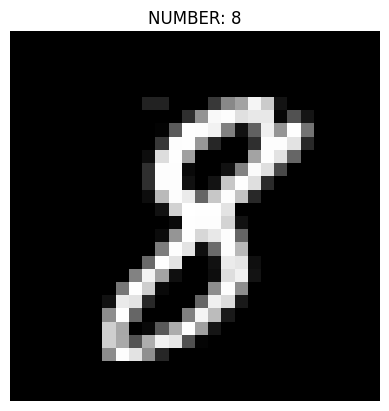

In [10]:
row_index = 20
label = train_data.iloc[row_index, 0]
pixels = train_data.iloc[row_index, 1:].values
image_matrix = pixels.reshape(28, 28)

plt.imshow(image_matrix, cmap='gray')
plt.title(f"NUMBER: {label}")
plt.axis('off')
plt.show

In [11]:
!pip install "protobuf<4.21.0"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

y = train_data["label"] # Cevaplar (0-9 arası rakamlar)
X = train_data.drop("label", axis=1) # Pikseller

# Normalizasyon

X = X / 255.0
test_data = test_data / 255.0 

# Modelin İskeleti
model = keras.Sequential([
    
    layers.Input(shape=(784,)),
    
    # 128 tane yapay nöron
    # activation = relu
    layers.Dense(128, activation='relu'),
    
    # activation='softmax': Sonuçları yüzdeye çevirir (Toplamı %100 olur)
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-me

In [12]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8436 - loss: 0.5441 - val_accuracy: 0.9489 - val_loss: 0.1793
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9540 - loss: 0.1577 - val_accuracy: 0.9605 - val_loss: 0.1330
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9711 - loss: 0.0997 - val_accuracy: 0.9676 - val_loss: 0.1093
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9789 - loss: 0.0736 - val_accuracy: 0.9707 - val_loss: 0.0994
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9835 - loss: 0.0562 - val_accuracy: 0.9737 - val_loss: 0.0894
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9880 - loss: 0.0398 - val_accuracy: 0.9714 - val_loss: 0.0938
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9905 - loss: 0.0322 - val_accuracy: 0.9731 - val_loss: 0.0957
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9928 - loss: 0.0245 - 

Uyarı: Veriler ham formatta (254 görüldü). Normalizasyon yapılıyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


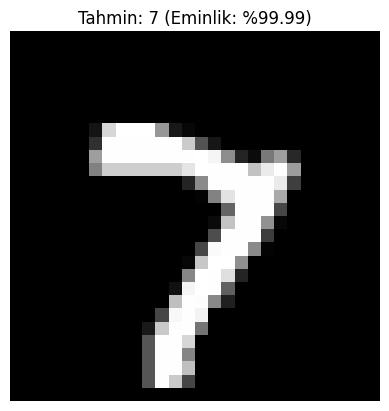

Seçilen Satır İndeksi: 22182


In [13]:

import matplotlib.pyplot as plt
import random


clean_test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Rastgele bir resim seç
random_idx = random.randint(0, len(clean_test_data) - 1)
raw_pixels = clean_test_data.iloc[random_idx].values


if raw_pixels.max() > 1.0:
    print(f"Uyarı: Veriler ham formatta ({raw_pixels.max()} görüldü). Normalizasyon yapılıyor...")
    normalized_pixels = raw_pixels / 255.0
else:
    normalized_pixels = raw_pixels

# TAHMİN
input_data = normalized_pixels.reshape(1, 784)
prediction_probs = model.predict(input_data)
predicted_num = np.argmax(prediction_probs)
confidence = np.max(prediction_probs) * 100

# SONUÇ EKRANI
plt.imshow(raw_pixels.reshape(28, 28), cmap='gray')
plt.title(f"Tahmin: {predicted_num} (Eminlik: %{confidence:.2f})")
plt.axis('off')
plt.show()

print(f"Seçilen Satır İndeksi: {random_idx}")

In [14]:


test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

#Normalizasyon (0-255 arasını 0-1 arasına çekiyoruz)

X_test = test_data / 255.0


# (Model olasılıkları verir: [[0.1, 0.9...], [0.8, 0.2...]])
predictions_prob = model.predict(X_test)


predictions_classes = np.argmax(predictions_prob, axis=1)


submission = pd.DataFrame({
    "ImageId": range(1, len(predictions_classes) + 1),
    "Label": predictions_classes
})

# Kaydet
submission.to_csv("submission.csv", index=False)

print("'submission_digit.csv' başarıyla oluşturuldu!")
print("Örnek tahminler:", predictions_classes[:10]) # İlk 10 tahmini göster

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
'submission_digit.csv' başarıyla oluşturuldu!
Örnek tahminler: [2 0 9 9 3 7 0 3 0 3]


In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")


y_cnn = train_df["label"]
X_raw = train_df.drop("label", axis=1)

# Normalizasyon
X_cnn = X_raw / 255.0
test_cnn = test_df / 255.0

# --- RESHAPE (28x28x1) ---

X_cnn = X_cnn.values.reshape(-1, 28, 28, 1)
test_cnn = test_cnn.values.reshape(-1, 28, 28, 1)

print("CNN Veri Şekli:", X_cnn.shape)

# MODEL 2 (CNN MİMARİSİ)

model2 = keras.Sequential([
    
    # İstasyon 1
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    # İstasyon 2
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # İstasyon 3 (Karar)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


history2 = model2.fit(X_cnn, y_cnn, epochs=10, batch_size=64, validation_split=0.2)

CNN Veri Şekli: (42000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8275 - loss: 0.5630 - val_accuracy: 0.9680 - val_loss: 0.0995
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9765 - loss: 0.0782 - val_accuracy: 0.9811 - val_loss: 0.0610
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9830 - loss: 0.0536 - val_accuracy: 0.9842 - val_loss: 0.0529
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9880 - loss: 0.0365 - val_accuracy: 0.9832 - val_loss: 0.0477
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9906 - loss: 0.0315 - val_accuracy: 0.9838 - val_loss: 0.0551
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9883 - val_loss: 0.0428
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9877 - val_loss: 0.0461
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9959 - loss: 0.0128 - 

In [16]:
import pandas as pd
import numpy as np


predictions_prob = model2.predict(test_cnn)


predictions_classes = np.argmax(predictions_prob, axis=1)


submission = pd.DataFrame({
    "ImageId": range(1, len(predictions_classes) + 1),
    "Label": predictions_classes
})


submission.to_csv("submission.csv", index=False)

print("✅ 'submission_cnn.csv' oluşturuldu! Kaggle'a yüklemeye hazır.")

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
✅ 'submission_cnn.csv' oluşturuldu! Kaggle'a yüklemeye hazır.


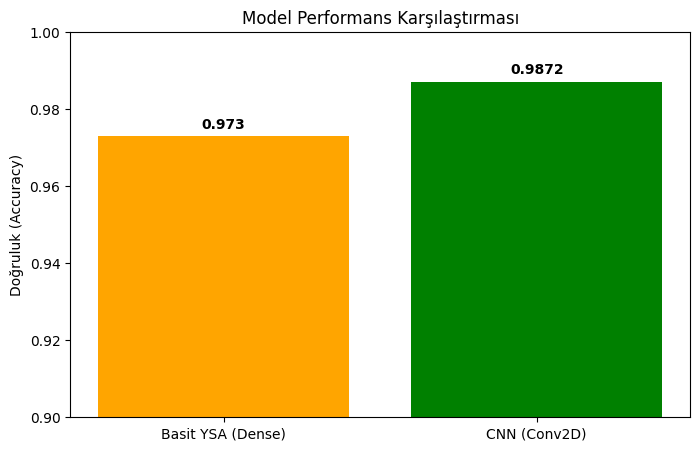

In [17]:
import matplotlib.pyplot as plt


models = ['Basit YSA (Dense)', 'CNN (Conv2D)']
scores = [0.9730, 0.9872] 

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['orange', 'green'])
plt.ylim(0.90, 1.0)
plt.title('Model Performans Karşılaştırması')
plt.ylabel('Doğruluk (Accuracy)')

for i, v in enumerate(scores):
    plt.text(i, v + 0.002, str(v), ha='center', fontweight='bold')

plt.show()